In [1]:
import os
import sys

# Use the current working directory instead of __file__
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

import matplotlib.pyplot as plt
import pandas as pd
import hardware_control.wx_programs as wx
import hardware_control.bnc as bnc
from classes.generator import *
from hardware_control.hardware_config import *
from experiment_configuration.values import *
from classes.qubit_class import *
import daq.daq_programs_homo as daq
import seaborn as sns
import standard_sequences.pinopi as pnp
import classifiers.classifier as classifier

In [2]:
q1 = Qubit(q1_dict, readout_dict)
q2 = Qubit(q2_dict, readout_dict)
print(f"{q1}\n{q2}")

Qubit(ro_amp=0.25, mixer_offset_ef=6, ROIF=0.10268999999999995, ge_ssm=-0.1144, ef_time=44, ef_amp=1.5, RO_LO=6.6247, IQ_angle=60, mixer_offset_ge=2.5, ro_dur=5000, RO_LO_pwr=16, qubit_id=q1, qubit_thr=[-10000, -600], RO_IF=None, ge_amp=1.01, ge_time=77, ef_half_time=25, ef_half_amp=1.3, ro_freq=6.72739, ef_ssm=-0.25684)
Qubit(ro_amp=0.45, mixer_offset_ef=None, ROIF=0.030840000000000423, ge_ssm=-0.154, ef_time=None, ef_amp=1, RO_LO=6.6247, IQ_angle=25, mixer_offset_ge=None, ro_dur=5000, RO_LO_pwr=16, qubit_id=q2, qubit_thr=[-10000, 1900], RO_IF=None, ge_amp=0.4, ge_time=74, ef_half_time=None, ef_half_amp=None, ro_freq=6.65554, ef_ssm=-0.2962)


In [3]:
wx_addr = wx.get_wx_address()
main_directory = r"C:\Users\quantum1\Documents"
save_dir = rf"{main_directory}\Python Scripts\Important Blue Fridge Python Files\New\nonlinear_QM\data"
target_bnc_address_6 = "USB0::0x03EB::0xAFFF::411-433500000-0753::INSTR"
bnc.set_bnc_output(
    general_vals_dict["qubit_bnc"], power_dBm=13, bnc_addr=target_bnc_address_6
)
bnc.set_bnc_output(
    readout_dict["RO_LO"],
    power_dBm=readout_dict["RO_LO_pwr"],
    bnc_addr=bnc_address["target_bnc_black"],
)

num_steps = 3
reps = 50000
swap_freq= -.0194
swap_time=0.5*7/abs(swap_freq)



writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 3
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
10.225.208.207
0, No error
10.225.208.207
0, No error
0, No error
10.225.208.207
0, No error
10.225.208.207
0, No error
Patterns: 3
Records per pattern: 50000
Buffers per acquistion: 49
DAQ samples per pattern: 8192
0, No error
Capturing 49 buffers. Press <enter> to abort
Capture completed in 16.731769 sec
Captured 49 buffers (2.928561 buffers per sec)
Captured 150528 records (8996.538216 records per sec)
Transferred 2466250752 bytes (147399282.136953 bytes per sec)


<Figure size 800x800 with 0 Axes>

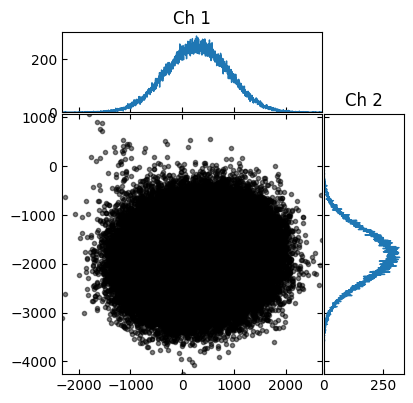

<Figure size 800x800 with 0 Axes>

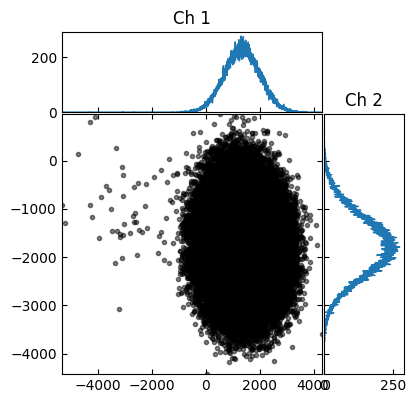

writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 3
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
10.225.208.207
0, No error
10.225.208.207
0, No error
0, No error
10.225.208.207
0, No error
10.225.208.207
0, No error
Patterns: 3
Records per pattern: 50000
Buffers per acquistion: 49
DAQ samples per pattern: 8192
0, No error
Capturing 49 buffers. Press <enter> to abort
Capture completed in 18.270422 sec
Captured 49 buffers (2.681930 buffers per sec)
Captured 150528 records (8238.890166 records per sec)
Transferred 2466250752 bytes (134985976.484571 bytes per sec)


<Figure size 800x800 with 0 Axes>

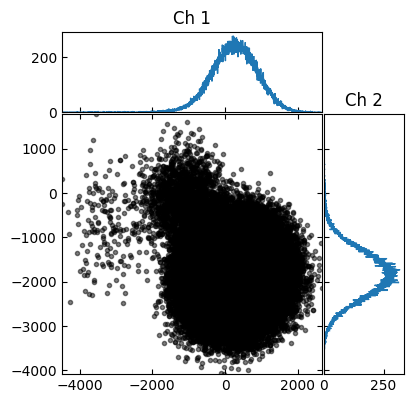

<Figure size 800x800 with 0 Axes>

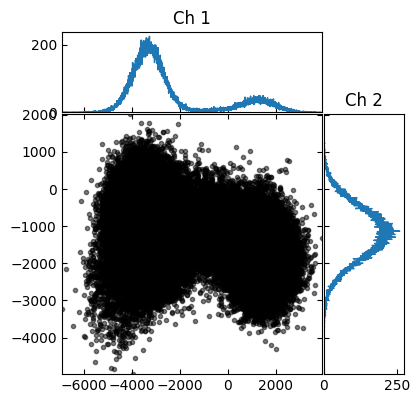

writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 3
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
10.225.208.207
0, No error
10.225.208.207
0, No error
0, No error
10.225.208.207
0, No error
10.225.208.207
0, No error
Patterns: 3
Records per pattern: 50000
Buffers per acquistion: 49
DAQ samples per pattern: 8192
0, No error
Capturing 49 buffers. Press <enter> to abort
Capture completed in 15.897591 sec
Captured 49 buffers (3.082228 buffers per sec)
Captured 150528 records (9468.604468 records per sec)
Transferred 2466250752 bytes (155133615.608469 bytes per sec)


<Figure size 800x800 with 0 Axes>

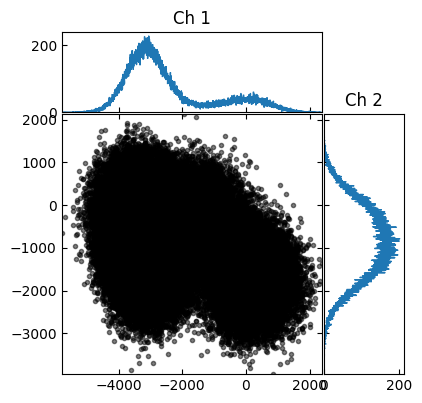

<Figure size 800x800 with 0 Axes>

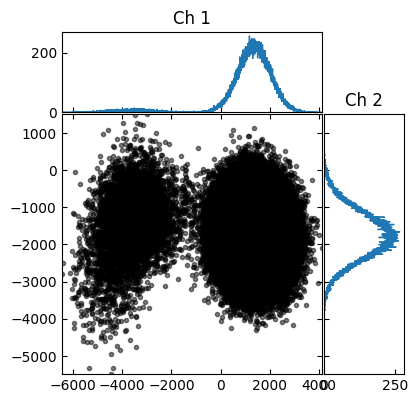

In [4]:
phase = 0
swap_amp = 1.36  
for i in range(3):
    if 0 == i:
        label = "G"
        pnp.pi_nopi_swap(
            q1,
            q2,
            general_vals_dict,
            copief=0,
            coswap=1,
            copige=0,
            num_steps=3,
            swap_freq=swap_freq,
            swap_time=swap_time,
            phase=phase,
            swap_amp=swap_amp,
        )
    elif 1 == i:
        label = "E"
        # E prep
        pnp.pi_nopi_swap(
            q1,
            q2,
            general_vals_dict,
            copief=0,
            coswap=1,
            copige=1,
            num_steps=3,
            swap_freq=swap_freq,
            swap_time=swap_time,
            phase=phase,
            swap_amp=swap_amp,
        )
    elif 2 == i:
        label = "F"
        # F prep
        pnp.pi_nopi_swap(
            q1,
            q2,
            general_vals_dict,
            copief=1,
            coswap=1,
            copige=1,
            num_steps=3,
            swap_freq=swap_freq,
            swap_time=swap_time,
            phase=phase,
            swap_amp=swap_amp,
        )

    wx.wx_set_and_amplitude_and_offset(
        amp=general_vals_dict["wx_amps"], offset=general_vals_dict["wx_offs"]
    )
    values = daq.run_daq_het_2q(
        q1, q2, num_patterns=num_steps, num_records_per_pattern=reps, verbose=True
    )

    # Retrieve raw IQ data from the acquired values
    I1_raw = values.rec_readout_1[0][0 : reps * num_steps]
    Q1_raw = values.rec_readout_1[1][0 : reps * num_steps]
    I2_raw = values.rec_readout_2[0][0 : reps * num_steps]
    Q2_raw = values.rec_readout_2[1][0 : reps * num_steps]

    # Build a DataFrame from the IQ data for classification
    IQ_df = pd.DataFrame({"I1": I1_raw, "Q1": Q1_raw, "I2": I2_raw, "Q2": Q2_raw})
    if 0 == i:
        g_IQ = IQ_df
        classified = classifier.classify(g_IQ)
        states = classified["predicted"]
        # Reshape the predicted states.
        # (Assume that classifier.reshape_for_exp returns an array of shape (num_steps, reps),
        #  where each row corresponds to a time step and holds all the state measurements for that step.)
        states_reshaped = classifier.reshape_for_exp(states, reps, num_steps)
        probabilties_g = classifier.probabilities(states_reshaped)
    elif 1 == i:
        e_IQ = IQ_df
        classified = classifier.classify(e_IQ)
        states = classified["predicted"]
        # Reshape the predicted states.
        # (Assume that classifier.reshape_for_exp returns an array of shape (num_steps, reps),
        #  where each row corresponds to a time step and holds all the state measurements for that step.)
        states_reshaped = classifier.reshape_for_exp(states, reps, num_steps)
        probabilties_e = classifier.probabilities(states_reshaped)
    else:
        f_IQ = IQ_df
        classified = classifier.classify(f_IQ)
        states = classified["predicted"]
        # Reshape the predicted states.
        # (Assume that classifier.reshape_for_exp returns an array of shape (num_steps, reps),
        #  where each row corresponds to a time step and holds all the state measurements for that step.)
        states_reshaped = classifier.reshape_for_exp(states, reps, num_steps)
        probabilties_f = classifier.probabilities(states_reshaped)


In [7]:
P_gg=np.mean(probabilties_g['P_g'])
P_eg=np.mean(probabilties_g['P_e'])
P_fg=np.mean(probabilties_g['P_f'])
P_ee=np.mean(probabilties_e['P_e'])
P_fe=np.mean(probabilties_e['P_f'])
P_ge=np.mean(probabilties_e['P_g'])
P_ff=np.mean(probabilties_f['P_f'])
P_ef=np.mean(probabilties_f['P_e'])
P_gf=np.mean(probabilties_f['P_g'])
P_matrix=np.array([[P_gg, P_ge, P_gf], [P_eg, P_ee, P_ef], [P_fg, P_fe, P_ff]])
print(P_matrix)
print(P_gg+P_eg+P_fg)
print(P_ge+P_ee+P_fe)
print(P_gf+P_ef+P_ff)

[[0.99152    0.16537333 0.13272667]
 [0.00282667 0.82581333 0.03276667]
 [0.00565333 0.00881333 0.83450667]]
0.9999999999999999
0.9999999999999999
1.0


In [8]:
import joblib

#save model
joblib.dump(P_matrix, "scale_matrix.pkl")

['scale_matrix.pkl']